### Project  by Aniket Amar Thopte


###### The problem statement deals with hourly load forecasting. We have been given dataset from 2002 to 2005 (i.e. 4 years data) on hourly basis. I have used Simple Linear Regression technique for forecasting the load for 2006 year on hourly basis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df=pd.read_csv("History.csv")

In [2]:
df.head(24)

,Date,Hour,Temperature,Load
0,1-Jan-02,1,54.86,1031754.25
1,1-Jan-02,2,54.23,996580.00
2,1-Jan-02,3,53.72,968291.00
3,1-Jan-02,4,53.38,963509.75
4,1-Jan-02,5,52.91,983291.25
5,1-Jan-02,6,52.51,1029652.50
6,1-Jan-02,7,51.80,1100430.00
7,1-Jan-02,8,52.08,1192213.75
8,1-Jan-02,9,55.28,1282886.75
9,1-Jan-02,10,59.47,1307903.00


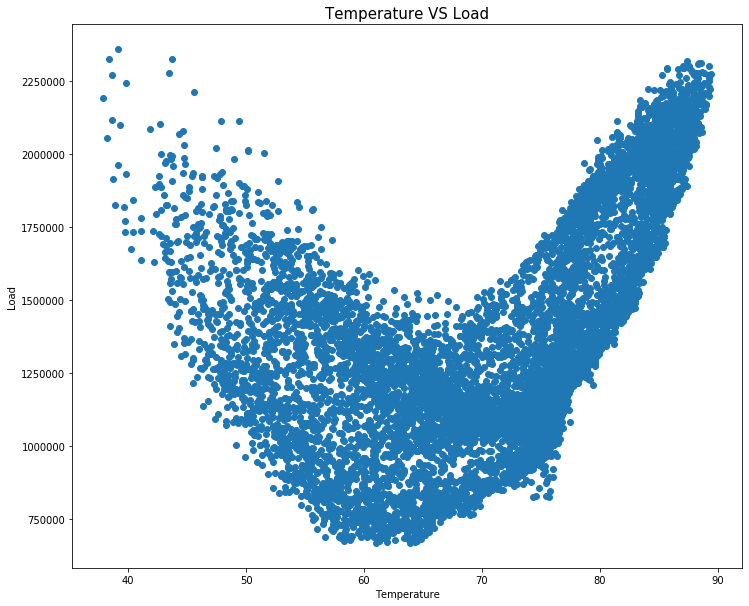

In [3]:
plt.figure(figsize=(12,10))
plt.scatter(df['Temperature'],df['Load'])
plt.title('Temperature VS Load',fontsize=15)
plt.ylabel('Load')
plt.xlabel('Temperature')
plt.show()

# Applying Linear Regression Model

We set the data for training & testing purpose. We have selected all the rows and only Temperature & Load.

In [4]:
X=df.iloc[:,1:3].values
Y=df.iloc[:,3].values

In [5]:
#Scikit-learn is a free machine learning library for Python.
#It features various algorithmslike support vector machine, random forests, and k-neighbours.
#Also supports Python numerical and scientific libraries like NumPy and SciPy.

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=1/3,random_state=0)

We recall Linear Regreesion function from sklearn library.

In [7]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We give the command for testing and predicting.

In [8]:
predicted=reg.predict(xtest)

In [9]:
predicted[:10]

array([1193548.2055955 , 1016321.65744966, 1375776.68149244,
       1432149.4633588 , 1590573.41697048, 1483899.44806514,
       1562429.33800892, 1400283.00642703, 1591656.62898614,
       1088334.30052165])

In [10]:
ytest[:10]

array([ 940522.75,  721025.25, 1383331.  , 1138872.  , 1718659.75,
       1133032.  , 1974775.25, 1364149.  ,  992579.25, 1464552.  ])

In [11]:
xtrain

array([[ 7.  , 41.84],
       [15.  , 77.18],
       [ 8.  , 62.57],
       ...,
       [12.  , 85.97],
       [ 1.  , 72.43],
       [21.  , 70.16]])

# Making the Forecast

We load the 'Fcst.csv' file where the outcome variable & predictor variable is there.

In [12]:
df1=pd.read_csv("Fcst.csv")

In [13]:
dfnew=df1.iloc[:,1:3]

We set the variable 'newpred' for forecasting purpose. 

In [14]:
newpred=reg.predict(dfnew)

In [15]:
newpred=newpred.astype(int)

In [16]:
newpred

array([ 963098,  984605, 1006581, ..., 1579035, 1597256, 1615478])

Now the forecasting is done, we recall the function to convert the array to .csv file.

In [17]:
import numpy as np
np.savetxt('array.csv', newpred, delimiter=',', fmt='%d')

Hence a new array.csv file is generated with the 8760 load forecast values for year 2006.